# Setting up the environment

In [1]:
!git clone https://github.com/ta3map/ADC_simulator.git

Cloning into 'ADC_simulator'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 49 (delta 7), reused 47 (delta 5), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from IPython.display import Audio
from ADC_simulator import ADC

In [ ]:
ADC.hello()

# Task 1. ADC (simulator) optimization
The main **goal** of the task is to make the given sound recording perceivable by converting the analog signal and making it digital. 
Thus, I needed to proceed with the steps: \
1. understand the conversion process quantization by following the tutorial \
2. understand the meaning behind sampling parameters for the quanzation procedure
3. choose the sampling parameters \

As a result, I have the following tuned parameters for the analog-to-digital converter:
- number of samples to record: `samples = 112000` \\
The number of samples can be evaluated by gradually increasing its value and listening the resultant recording for the moment when it starts to have external hissing after spoken words. \\
- sampling rate: `fs = 32000` \\
The sampling rate was chosen according to pace of the recording and the tone of the voice. If the speech was too fast and the tone was too high, the sampling rate was increased to make the tone to be more human-like and the temp to be intermidiate.
- quantization levels: `quant_levels = 1024` \\
I conducted a researched and found out that there are 3 common numbers: 256, 65536 and 16.8 million levels. I tried them all with other intermidiate values such as 512, 1024 and 4096. Personally, I couldn't hear any difference increasing the number of levels more than `256`. So, I decided to set the number of levels to `256` as a sufficient amount. 

In [3]:
v = 5 # student variant 5
samples = 112000 # number of samples to acquire 
fs = 32000 # samples per second
quant_levels = np.linspace(-1,1,256) # levels between -1 and 1 

# Sound recording
recorded_samples = ADC.rec(v, samples, quant_levels, fs) 
Audio(recorded_samples,rate=fs)

Next, I build a graph of the correctly recorded data.

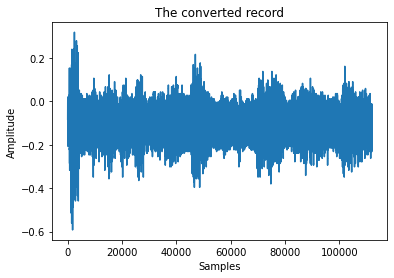

In [ ]:
plt.plot(recorded_samples)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('The converted record')
plt.show()

The following examples show how incorrectly tuned parameters change the record: \
1. example with too large number of samples where we can hear extra noise at the end
2. example with too small sampling rate where we can hear too high and too fast voice tone

In [4]:
# example with the increased number of samples where we can hear extra noise at the end
samples_inc = 122000 # number of samples to acquire 

# Sound recording
recorded_samples_inc_samples = ADC.rec(v, samples_inc, quant_levels, fs) 
Audio(recorded_samples_inc_samples,rate=fs)

In [5]:
# example with the decreased sampling rate where we can hear too high and too fast voice tone
fs_dec = 20000 # samples per second
quant_levels = np.linspace(-1,1,256) # levels between -1 and 1 

# Sound recording
recorded_samples_dec_rate = ADC.rec(v, samples, quant_levels, fs_dec) 
Audio(recorded_samples_dec_rate,rate=fs)

# Task 2. Data processing
The **goal** of this task is to compensate the amplitude offset.\
The **solution** is to substract from each element of amplitude's array `y` the offset which is equal to the mean value of this array, because mean is a central value of our set of amplitudes. Looking at the graph, we can see that it has been moved, and now is located symmetrically across the value of `y = 0`.  

In [7]:
from numpy import sin, pi

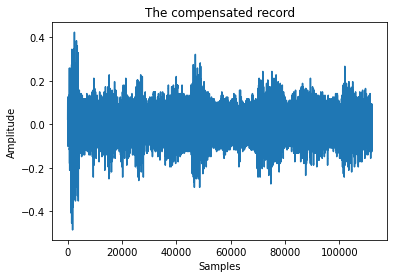

In [8]:
# compensate amplitude offset
# some general offset from zero amplitude is mean of the y values 
# the offset is subtracted
y_compensated = []
for y_element in recorded_samples:
  y_compensated.append(y_element - np.mean(recorded_samples))

plt.plot(y_compensated)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('The compensated record')
plt.show()

The next **goal** is to compensate sinusoidal interference. \\
The **solution** is to subtract the sinusoidal wave from the recording. The sinusoidal wave is calculated by the formula: \
`y_sin(n) = A*sin(2*pi*f/fs*n)` \
As `n` we take sample elements from the array `x`, because our signal is discrete. \
Also we need to tune the value of sinusoid's frequency `f` which should be equal to `210`. It was discovered by iterating over all integer values of frequencies in the suggested range `[120..210]`.   

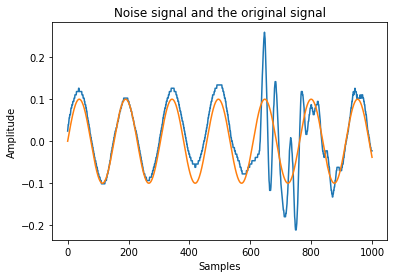

In [9]:
# plot original signal and noise

samples_example = 1000
x_example = np.linspace(0, samples_example, samples_example)
y_example = y_compensated[0:samples_example]

A = 0.1 # The amplitude value is 0.1
f = 210 # The range of possible frequencies is from 120 to 210 Hz.
sin_example = []
for element in x_example:
  sin_example.append(A*sin(2*pi*f/fs*element))

plt.plot(x_example, y_example)
plt.plot(x_example, sin_example)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Noise signal and the original signal')
plt.show()

**Conclusion**: analysing the graph, we can conlude that the most suitable frequency `f` is equal to `210`, because the noisy sinusiod and the original sinusoid are very close to each other and mostly coincide. 

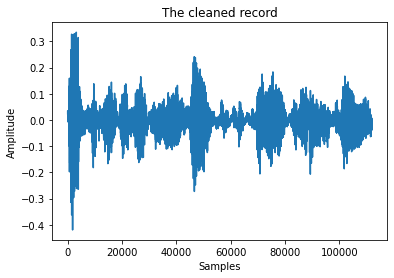

In [10]:
# Compensate sinusoidal interference. 
# The microphone also recorded some background signals which we need to delete. 
# This signal has a shape of a sine wave.

sin_noise = []
x = np.linspace(0, samples, samples)
for element in x:
  sin_noise.append(A*sin(2*pi*f/fs*element))


# subtract the sinusoidal wave from the recording
y_clear = []
i = 0
for y_element in y_compensated:
  y_clear.append(y_element - sin_noise[i])
  i += 1

plt.plot(x, y_clear)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('The cleaned record')
plt.show()

# play the recording without noise
Audio(y_clear,rate=fs)

After plotting the cleaned signal, we can see how it differs from the originally noisy one. And the signal has become more well-defined. 

# Bonus Task
The **goal** is to collect and combine fragments of a poem into a single recording, and guess the author of it. \
So, the author is a famous writer Edgar Allan Poe, and the poem is called “Alone”. \
My steps to accomplish the task:
1. tune the parameters - sample number and sample rate - for each of the 14 recordings
2. combine arrays of signals into a single array 
3. play the combined recording with the sampling rate equal to the mean value of the sample rate's array

In [ ]:
samples_array = [160000, 55000, 112000, 77000, 112000, 144000, 176000, 115000, 75000, 88000, 141000, 115000, 110000, 225000]
fs_array = [32000, 22000, 32000, 22000, 32000, 32000, 32000, 32000, 22000, 22000, 32000, 32000, 22000, 32000]
fs_mean = np.mean(fs_array)
recordings = []
for variant in range(1, 15):
  recordings.extend(ADC.rec(variant, samples_array[variant-1], quant_levels, fs_array[variant-1]))
 
Audio(recordings, rate=fs_mean)

Output hidden; open in https://colab.research.google.com to view.